### Project 2 Classification Models 

###### Group Number - 27 

###### Member 1 : Hareesh Rajendran 

###### Member 2 : Saradha Ramakrishnan

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import recall_score

warnings.filterwarnings('ignore')

Importing the weather in australia dataset into dataframe 

In [7]:
dataframe = pd.read_csv("weatherAUS.csv")

#### Preprocessing the dataset

Taking a sample of the dataset because there are too many instances in the original dataset.

In [8]:
dataframe = dataframe.sample(n=7500,random_state=0)

Filling the null values in the dataset with mean and median. 

In [9]:
dataframe['MinTemp'] = dataframe['MinTemp'].fillna((dataframe['MinTemp'].mean()))
dataframe['MaxTemp'] = dataframe['MaxTemp'].fillna((dataframe['MaxTemp'].mean()))
dataframe['Rainfall'] = dataframe['Rainfall'].fillna((dataframe['Rainfall'].median()))
dataframe['Evaporation'] = dataframe['Evaporation'].fillna((dataframe['Evaporation'].median()))
dataframe['Sunshine'] = dataframe['Sunshine'].fillna((dataframe['Sunshine'].median()))
dataframe['WindGustSpeed'] = dataframe['WindGustSpeed'].fillna((dataframe['WindGustSpeed'].median()))
dataframe['WindSpeed9am'] = dataframe['WindSpeed9am'].fillna((dataframe['WindSpeed9am'].median()))
dataframe['WindSpeed3pm'] = dataframe['WindSpeed3pm'].fillna((dataframe['WindSpeed3pm'].median()))
dataframe['Humidity9am'] = dataframe['Humidity9am'].fillna((dataframe['Humidity9am'].mean()))
dataframe['Humidity3pm'] = dataframe['Humidity3pm'].fillna((dataframe['Humidity3pm'].mean()))
dataframe['Pressure9am'] = dataframe['Pressure9am'].fillna((dataframe['Pressure9am'].median()))
dataframe['Pressure3pm'] = dataframe['Pressure3pm'].fillna((dataframe['Pressure3pm'].median()))
dataframe['Cloud9am'] = dataframe['Cloud9am'].fillna((dataframe['Cloud9am'].median()))
dataframe['Cloud3pm'] = dataframe['Cloud3pm'].fillna((dataframe['Cloud3pm'].median()))
dataframe['Temp3pm'] = dataframe['Temp3pm'].fillna((dataframe['Temp3pm'].mean()))
dataframe['Temp9am'] = dataframe['Temp9am'].fillna((dataframe['Temp9am'].mean()))
dataframe['RainToday'] = dataframe['RainToday'].fillna('No')

Replacing 'Yes' and 'No' with 0 and 1.

In [10]:
dataframe['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
dataframe['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

Dropping insignificant columns.

In [11]:
dataframe = dataframe.drop('Date', axis=1)
dataframe = dataframe.drop('Location', axis=1)
dataframe = dataframe.drop('RISK_MM', axis=1)
dataframe = dataframe.drop('WindGustDir', axis=1)
dataframe = dataframe.drop('WindDir3pm', axis=1)
dataframe = dataframe.drop('WindDir9am', axis=1)

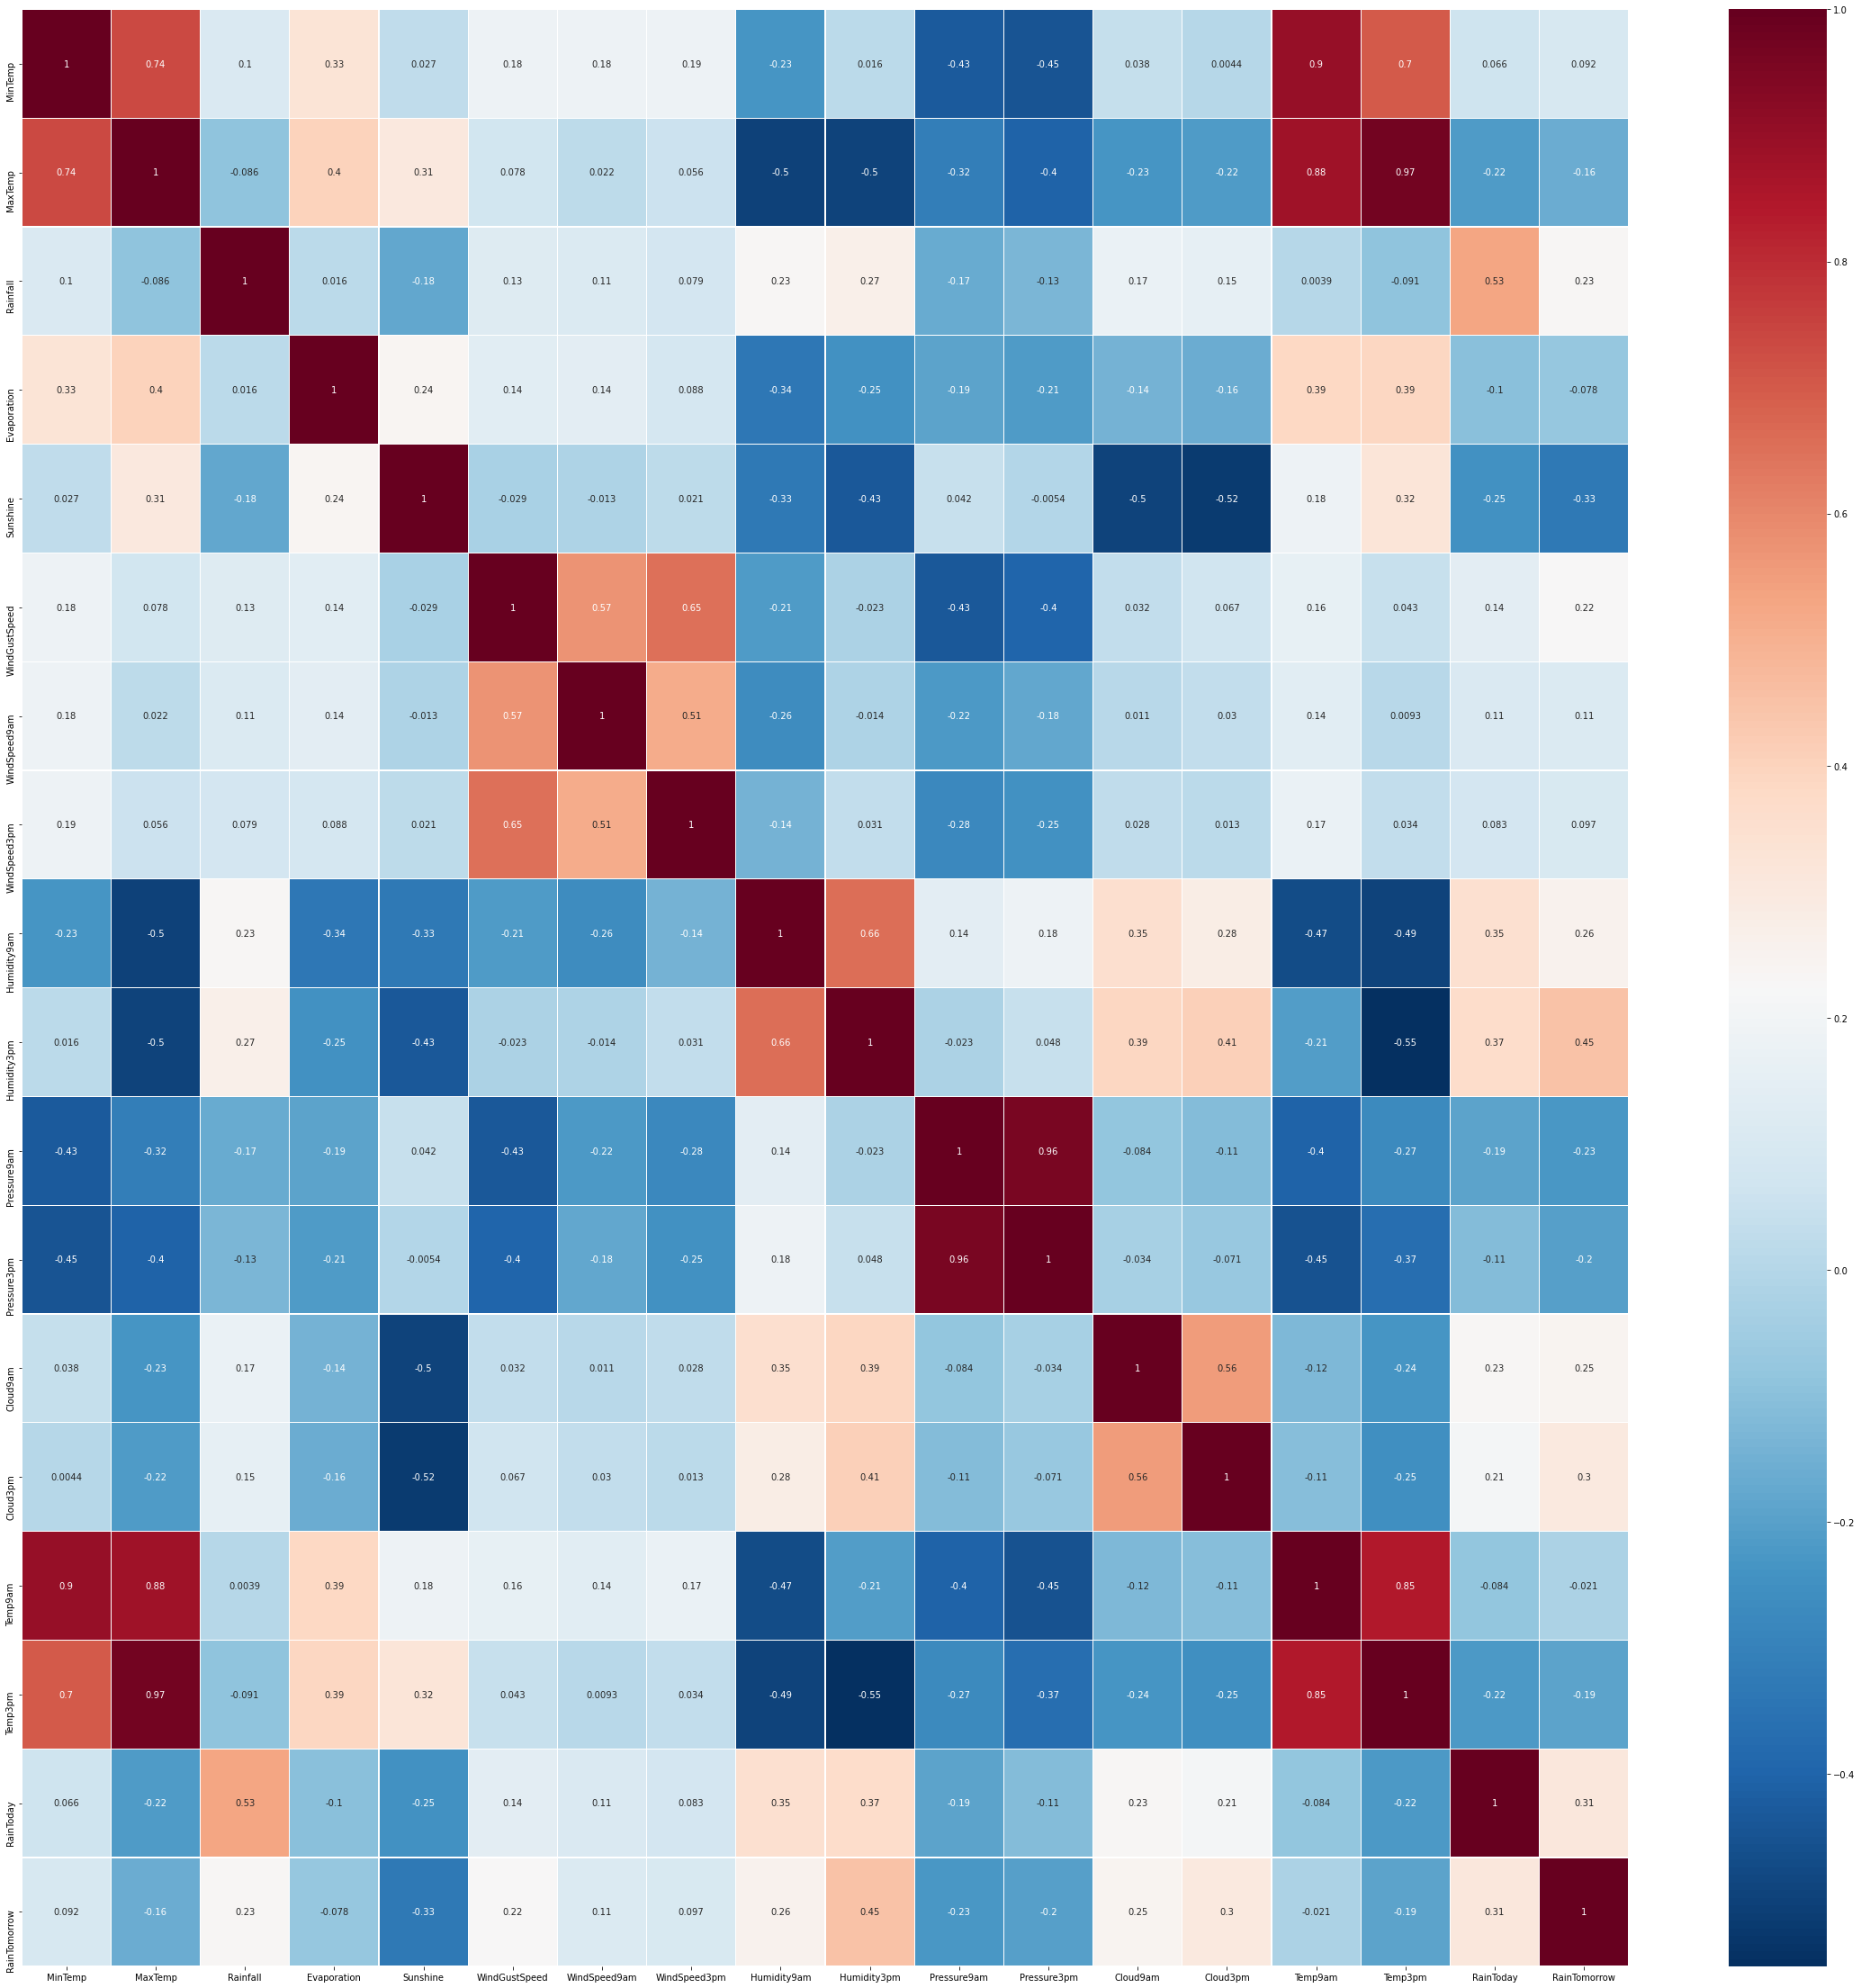

In [12]:
dataframe_corr =dataframe.corr()

import seaborn as sns
fig, ax = plt.subplots(figsize=(40,40)) 
sns.heatmap(dataframe_corr,annot=True,cmap='RdBu_r',linewidths=0.15, ax=ax)

#### Splitting the dataset

In [13]:
X = dataframe.iloc[:,:16]
y =  dataframe['RainTomorrow']

X_train_org, X_test_org, y_train, y_test = train_test_split(X,y, random_state = 0)

In [15]:
dataframe.shape

(7500, 18)

#### Scaling the dataset

In [9]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

#### KNN Classifier

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.83


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    3.4s finished


In [11]:
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test, y_test)))

Train score: 0.8492
Test score: 0.8368


In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.84115139 0.83795309 0.84221748 0.84738527 0.8153682  0.82390608]
0.8346635855635679


In [13]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(15)
knn.fit(X_train, y_train)
ypred = knn.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[1392  236]
 [  70  177]]
0.5363636363636364


#### KNN Classification Results 
\
From the Grid Search Analysis, We have concluded that the optimal number of neighbours is 15.
\
The following are the scores.\
Train Score :0.8492\
Test score: 0.8368\
Cross Validation Score : 0.8346

#### Logistic Regression 

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, random_state=0)
grid_search.fit(X_train1, y_train1)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [15]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.01, 'penalty': 'l1'}
Best cross-validation score: 0.85


In [16]:
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l1.fit(X_train, y_train)
print(log_l1.score(X_train, y_train))
print(log_l1.score(X_test, y_test))

0.7960888888888888
0.8085333333333333


In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.79317697 0.79211087 0.79530917 0.78548559 0.76840982 0.773746  ]
0.7845285313029303


In [18]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l1.fit(X_train, y_train)
ypred = log_l1.predict(X_test)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.2597938144329897
[[1453  350]
 [   9   63]]


In [19]:
c_range = [0.01, 0.1, 1, 10, 100]
train_score_l1 = []
train_score_l2 = []
test_score_l1 = []
test_score_l2 = []

for c in c_range:
    log_l1 = LogisticRegression(penalty = 'l1', C = c, solver = 'saga')
    log_l2 = LogisticRegression(penalty = 'l2', C = c, solver = 'saga')
    log_l1.fit(X_train, y_train)
    log_l2.fit(X_train, y_train)
    train_score_l1.append(log_l1.score(X_train, y_train))
    train_score_l2.append(log_l2.score(X_train, y_train))
    test_score_l1.append(log_l1.score(X_test, y_test))
    test_score_l2.append(log_l2.score(X_test, y_test))

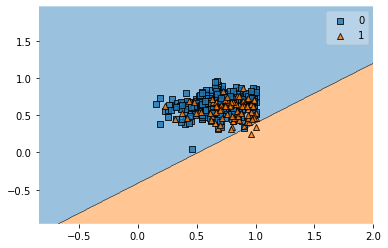

In [20]:
%matplotlib inline

from mlxtend.plotting import plot_decision_regions

X_b = X_train[100:500, [8,10]]
y_b = y_train[100:500].to_numpy()

lreg = LogisticRegression()
lreg.fit(X_b, y_b) 

plot_decision_regions(X_b, y_b, clf = lreg)

#### Logistic Regression Results
\
From the Grid Search Analysis, we conclude that the optimal c value is 0.01 and the optimal penal is l1.\
The following are the scores.\
Train Score : 0.7960\
Test Score : 0.8085 \
Cross Validation Score : 0.7845 

#### Linear SVC

In [21]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train,y_train)

print(clf.score(X_train,y_train))
print(clf.score(X_test,y_test))

0.8408888888888889
0.8538666666666667


In [22]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train, y_train, cv=kfold)))
scores = cross_val_score(clf , X_train, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.83688699 0.85074627 0.84328358 0.84951974 0.82497332 0.83244397]
0.8396423129056654


In [23]:
from sklearn.metrics import f1_score
svc = LinearSVC()
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[1394  206]
 [  68  207]]
0.6017441860465117


#### Linear SVC
\
The following are the scores.\
Train Score : 0.8408 \
Test Score : 0.8538\
Cross Validation Score : 0.8396

#### SVC - Linear Kernel

In [24]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [25]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1}
Best cross-validation score: 0.84


In [26]:
svc = SVC(kernel='linear', C=1)
svc.fit(X_train,y_train)

print(svc.score(X_train,y_train))
print(svc.score(X_test,y_test))

0.8421333333333333
0.8549333333333333


In [27]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 1)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

Cross-validation scores:
[0.83901919 0.84541578 0.84861407 0.85058698 0.82817503 0.8303095 ]
[0.83901919 0.84541578 0.84861407 0.85058698 0.82817503 0.8303095 ]
0.8403534242190481


In [28]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train, y_train)
ypred = svc.predict(X_test)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[1399  209]
 [  63  204]]
0.6


#### SVM Linear Kernel Results
\
From the Grid Search Analysis, we conclude that the optimal c value is 1.\
The following are the scores.\
Train Score : 0.8421 \
Test Score : 0.8549\
Cross Validation Score : 0.8403

#### SVC - RBF Kernel 

In [29]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'gamma' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [30]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.84


In [31]:
svc2 = SVC(kernel='rbf', gamma=1, C=1)
svc2.fit(X_train,y_train)

print(svc2.score(X_train,y_train))
print(svc2.score(X_test,y_test))

0.8524444444444444
0.8565333333333334


In [32]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 1,gamma = 1)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.84434968 0.85394456 0.85181237 0.85378869 0.82604055 0.83991462]
0.8449750788669853


In [33]:
from sklearn.metrics import f1_score
svc1 = SVC(kernel = 'rbf', C = 1 , gamma = 1)
svc1.fit(X_train, y_train)
ypred = svc1.predict(X_test)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


[[1409  216]
 [  53  197]]
0.5942684766214178


#### SVM RBF Kernel Results
\
From the Grid Search Analysis, we conclude that the optimal c value is 1 and gamma value is also 1.\
The following are the scores.\
Train Score : 0.8524 \
Test Score : 0.8565\
Cross Validation Score : 0.8449 

#### SVC - Poly Kernel 

In [34]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'poly')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'degree' : [2,3,4,5]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [35]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 2}
Best cross-validation score: 0.84


In [36]:
svc3 = SVC(kernel='poly', degree=2, C=100)
svc3.fit(X_train,y_train)

print(svc3.score(X_train,y_train))
print(svc3.score(X_test,y_test))

0.8453333333333334
0.856


In [37]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc2 = SVC(kernel = 'poly',C = 100,degree = 2)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc2 , X_train, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.84328358 0.85074627 0.84754797 0.84951974 0.82710779 0.84098186]
0.8431978694725792


In [38]:
from sklearn.metrics import f1_score
svc2 = SVC(kernel = 'poly', C = 100 , degree = 2)
svc2.fit(X_train, y_train)
ypred = svc2.predict(X_test)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


[[1407  215]
 [  55  198]]
0.5945945945945946


#### SVM Poly Kernel Results
\
From the Grid Search Analysis, we conclude that the optimal c value is 100 and degree is 2.\
The following are the scores.\
Train Score : 0.8453 \
Test Score : 0.856\
Cross Validation Score : 0.8431

#### Desicion Tree Classifier

In [39]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,10):
    dtree_clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree_clf.fit(X_train, y_train)
    train= dtree_clf.score(X_train, y_train)
    test = dtree_clf.score(X_test, y_test)
    print("Accuracy on training set: {:.3f}".format(dtree_clf.score(X_train, y_train)))
    print("Accuracy on test set: {:.3f}".format(dtree_clf.score(X_test, y_test)))

Accuracy on training set: 0.818
Accuracy on test set: 0.818
Accuracy on training set: 0.825
Accuracy on test set: 0.837
Accuracy on training set: 0.837
Accuracy on test set: 0.837
Accuracy on training set: 0.841
Accuracy on test set: 0.839
Accuracy on training set: 0.852
Accuracy on test set: 0.842
Accuracy on training set: 0.865
Accuracy on test set: 0.834
Accuracy on training set: 0.878
Accuracy on test set: 0.833
Accuracy on training set: 0.894
Accuracy on test set: 0.823
Accuracy on training set: 0.910
Accuracy on test set: 0.817


In [40]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [41]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [42]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.770


In [43]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 3}
Best cross-validation score: 0.83


In [44]:
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dtree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test, y_test)))

Accuracy on training set: 0.837
Accuracy on test set: 0.837


In [45]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=3, random_state=0)
dtree.fit(X_train, y_train)
ypred = dtree.predict(X_test)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[1387  230]
 [  75  183]]
0.5454545454545454


#### Decision Tree Results

From the analysis above, we conclude that the optimal depth is 3.\
The following are the scores.\
Train Score : 0.837\
Test Score : 0.837\
Cross Validation Score : 0.83

#### Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs= -1,random_state=0)

param_grid = { 'n_estimators' : [100,200,300,400,500],
          'max_depth': [6,8,10,12,14]
             }

grid_search = GridSearchCV(rf, param_grid,cv=6)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [47]:
grid_search.best_params_

{'max_depth': 10, 'n_estimators': 500}

In [48]:
rf = RandomForestClassifier(n_estimators=500,max_depth=10,n_jobs=-1)
rf.fit(X_train, y_train)

print(rf.score(X_train,y_train))
print(rf.score(X_test,y_test))

0.9308444444444445
0.8496


#### Random Forest Classifier

The above Grid Search Results show us that the optimal max_depth is 10.\
The following are the results.\
Train Score : 0.9304\
Test Score : 0.8469

#### Hard Voting Classifier

In [49]:
log_clf = LogisticRegression(penalty = 'l1', C = 0.01)
log_clf.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(15)
knn_clf.fit(X_train, y_train)
svm_clf = SVC(C = 1, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('knn', knn_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, knn_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
print("Train Score: {:.3f}".format(dtree.score(X_train, y_train)))
print("Test Score: {:.3f}".format(dtree.score(X_test, y_test)))

LogisticRegression 0.8085333333333333
KNeighborsClassifier 0.8368
SVC 0.8533333333333334
VotingClassifier 0.8426666666666667
Train Score: 0.837
Test Score: 0.837


#### Soft Voting Classifier 

In [50]:
log_clf = LogisticRegression(penalty = 'l1', C = 0.01)
log_clf.fit(X_train, y_train)
dtree_clf = DecisionTreeClassifier(max_depth  = 3, random_state=0)
dtree_clf.fit(X_train, y_train)
svm_clf = SVC(C = 1, probability = True)
svm_clf.fit(X_train, y_train)

voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('dtree', dtree_clf), ('svc', svm_clf)], voting='soft')
voting_clf.fit(X_train, y_train)

from sklearn.metrics import accuracy_score
for clf in (log_clf, dtree_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    
print("Train Score: {:.3f}".format(dtree.score(X_train, y_train)))
print("Test Score: {:.3f}".format(dtree.score(X_test, y_test)))

LogisticRegression 0.8085333333333333
DecisionTreeClassifier 0.8373333333333334
SVC 0.8533333333333334
VotingClassifier 0.8512
Train Score: 0.837
Test Score: 0.837


>svm1 0.952 (0.018)
>svm2 0.542 (0.030)
>svm3 0.957 (0.018)
>svm4 0.617 (0.024)
>svm5 0.899 (0.035)
>soft_voting 0.955 (0.018)


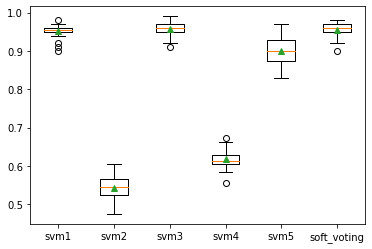

In [51]:
# compare soft voting ensemble to standalone classifiers
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from matplotlib import pyplot

# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=6, n_informative=2, n_redundant=3, random_state=0)
    return X, y

# get a voting ensemble of mode

def get_voting():
    # define the base models
    models = list()
    models.append(('svm1', SVC(probability=True, kernel='poly', degree=1)))
    models.append(('svm2', SVC(probability=True, kernel='poly', degree=2)))
    models.append(('svm3', SVC(probability=True, kernel='poly', degree=3)))
    models.append(('svm4', SVC(probability=True, kernel='poly', degree=4)))
    models.append(('svm5', SVC(probability=True, kernel='poly', degree=5)))
    # define the voting ensemble
    ensemble = VotingClassifier(estimators=models, voting='soft')
    return ensemble

# get a list of models to evaluate
def get_models():
    models = dict()
    models['svm1'] = SVC(probability=True, kernel='poly', degree=1)
    models['svm2'] = SVC(probability=True, kernel='poly', degree=2)
    models['svm3'] = SVC(probability=True, kernel='poly', degree=3)
    models['svm4'] = SVC(probability=True, kernel='poly', degree=4)
    models['svm5'] = SVC(probability=True, kernel='poly', degree=5)
    models['soft_voting'] = get_voting()
    return models

# evaluate a give model using cross-validation
def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

#### Bagging Classifier with Decision Tree

In [52]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier(max_depth = 3, random_state=0)
bag_clf = BaggingClassifier(dt_clf, n_estimators=500, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

from  sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.8506666666666667
Train score: 0.84
Test score: 0.85


#### Bagging Classifier with KNN 

In [53]:
knn_clf = KNeighborsClassifier(15)
bag_clf = BaggingClassifier(knn_clf, n_estimators=300, max_samples=100, bootstrap=True, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.8069333333333333
Train score: 0.79
Test score: 0.81


#### Pasting Classifier with SVC Linear Kernel

In [54]:
svc_clf = SVC(kernel='linear', C=1)
bag_clf = BaggingClassifier(svc_clf, n_estimators=200, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.8192
Train score: 0.81
Test score: 0.82


#### Pasting Classifier with Logistic Regression 

In [55]:
log_clf = LogisticRegression(penalty = 'l1', C = 0.01)
bag_clf = BaggingClassifier(log_clf, n_estimators=500, max_samples=100, bootstrap=False, n_jobs=-1, random_state=0)

bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

print(accuracy_score(y_test, y_pred))

bag_clf.fit(X_train, y_train)
print('Train score: {:.2f}'.format(bag_clf.score(X_train, y_train)))
print('Test score: {:.2f}'.format(bag_clf.score(X_test, y_test)))

0.7797333333333333
Train score: 0.77
Test score: 0.78


#### Adaboosting with Decision Tree Classifier

In [56]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=3), n_estimators=500,
    algorithm="SAMME.R", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 1.0000
Test score: 0.8160


#### Adaboosting with SVC - RBF Kernel 

In [57]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(
    SVC(kernel='rbf', gamma=1, C=1), n_estimators=500,
    algorithm="SAMME", learning_rate=0.5, random_state=0)
ada_clf.fit(X_train, y_train)
print('Train score: {:.4f}'.format(ada_clf.score(X_train, y_train)))
print('Test score: {:.4f}'.format(ada_clf.score(X_test, y_test)))

Train score: 0.7744
Test score: 0.7797


#### Gradient Boosting 

In [58]:
from sklearn.ensemble import GradientBoostingClassifier

gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.875
Accuracy on test set: 0.844


In [59]:
params = {
    'n_estimators': [50, 100, 200,500],
    'learning_rate':[0.1, 0.25, 0.5, 0.75, 1],
    'max_features':[2, 5,7 ]
    }
gc = GradientBoostingClassifier(random_state=0)

gc_grid = GridSearchCV(estimator=gc, param_grid=params, cv=5,iid = False)
gc_grid.fit(X_train, y_train)
best_params = gc_grid.best_params_
print(best_params)

{'learning_rate': 0.25, 'max_features': 2, 'n_estimators': 50}


In [60]:
gc = GradientBoostingClassifier(random_state=0,learning_rate= 0.25, max_features = 2, n_estimators = 50)
gc.fit(X_train, y_train)
y_pred= gc.predict(X_test)
print("Best recall score: {:.4f}".format(recall_score(y_test,y_pred,average='macro')))
print('Train score: {:.4f}'.format(gc.score(X_train, y_train)))
print('Test score: {:.4f}'.format(gc.score(X_test, y_test)))

Best recall score: 0.7280
Train score: 0.8731
Test score: 0.8453


#### PCA

In [61]:
from sklearn.decomposition import PCA

#create model
pca = PCA(n_components=0.95,random_state = 0)

#train pca model
pca.fit(X_train)

#transforming X_train and X_test
X_train_reduced = pca.transform(X_train)
X_test_reduced = pca.transform(X_test)

In [62]:
X_train_reduced

array([[-0.35708702, -0.08214371,  0.07823637, ...,  0.27904665,
         0.34633348, -0.21316374],
       [-0.14472712,  0.07626373, -0.17293122, ..., -0.10186584,
        -0.02501839,  0.01345745],
       [-0.70483756, -0.44279053, -0.22467044, ..., -0.25114573,
        -0.05593638,  0.03334153],
       ...,
       [-0.37162861,  0.18066031, -0.4136479 , ...,  0.10716549,
        -0.03640698, -0.03051398],
       [-0.3254036 , -0.23253338,  0.22715288, ..., -0.05946524,
        -0.02261973, -0.32786997],
       [-0.17645167, -0.26576003, -0.06067344, ...,  0.03135367,
        -0.33498857, -0.11574654]])

In [63]:
pca.n_components_

8

In [64]:
pca.explained_variance_

array([0.17304446, 0.0968115 , 0.04070515, 0.03986329, 0.03336828,
       0.02060628, 0.01943839, 0.01325095])

In [65]:
pca.explained_variance_ratio_

array([0.37710609, 0.21097587, 0.08870645, 0.08687183, 0.07271762,
       0.04490612, 0.04236098, 0.02887705])

In [66]:
scaler = MinMaxScaler()
X_train_pca = scaler.fit_transform(X_train_reduced)
X_test_pca = scaler.transform(X_test_reduced)

#### Running all the models after PCA

#### KNN Classifier

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

grid_parms_knn = {'n_neighbors':[1,5,10,15,20]}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(KNeighborsClassifier(), grid_parms_knn,verbose = 1,cv = 3, n_jobs=-1)
grid_search.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Best parameters: {'n_neighbors': 15}
Best cross-validation score: 0.83


[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:    4.4s finished


In [68]:
knn = KNeighborsClassifier(15)
knn.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(knn.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(knn.score(X_test_pca, y_test)))

Train score: 0.8446
Test score: 0.8368


In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(knn , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(knn , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.8336887  0.83688699 0.83688699 0.83457844 0.82177161 0.82070438]
0.8307528525993298


In [70]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
 
knn = KNeighborsClassifier(15)
knn.fit(X_train_pca, y_train)
ypred = knn.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[1394  238]
 [  68  175]]
0.5335365853658536


#### Logistic Regression 

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
model = LogisticRegression()
penalty = ['l1', 'l2']
C = [0.01,0.1,1,10,100]
parameters = dict(C=C, penalty=penalty)

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [72]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 0.1, 'penalty': 'l1'}
Best cross-validation score: 0.84


In [73]:
log_l1 = LogisticRegression(penalty = 'l1', C = 0.1)
log_l1.fit(X_train_pca, y_train)
print('Train score: {:.4f}'.format(log_l1.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(log_l1.score(X_test_pca, y_test)))

Train score: 0.8391
Test score: 0.8448


In [74]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(log_l1 , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(log_l1 , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.7750533  0.7803838  0.78678038 0.77801494 0.76093917 0.76520811]
0.7743966173098528


In [75]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
log_l1 = LogisticRegression(penalty = 'l1', C = 0.01)
log_l1.fit(X_train_pca, y_train)
ypred = log_l1.predict(X_test_pca)
ft = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(ft)
print(cm)

0.0
[[1462  413]
 [   0    0]]


#### Linear SVC

In [76]:
from sklearn.svm import LinearSVC

clf = LinearSVC()
clf.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(clf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(clf.score(X_test_pca, y_test)))

Train score: 0.8359
Test score: 0.8421


In [77]:
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(clf , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(clf , X_train_pca, y_train, cv=kfold)
print(np.mean(scores))

Cross-validation scores:
[0.84328358 0.84541578 0.84434968 0.83244397 0.82070438 0.82283885]
0.8348393722802362


In [78]:
from sklearn.metrics import f1_score
svc = LinearSVC()
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test, average = None)
print(cm)
print(f)

[[1392  226]
 [  70  187]]
[0.9038961  0.55820896]


#### SVC - Linear Kernel 

In [79]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'linear')

parameters = {'C': [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=3, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None, param_grid={'C': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [80]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100}
Best cross-validation score: 0.84


In [81]:
svc = SVC(kernel='linear', C=100)
svc.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svc.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(svc.score(X_test_pca, y_test)))

Train score: 0.8379
Test score: 0.8485


In [82]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc = SVC(kernel = 'linear',C = 1)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.84008529 0.84541578 0.84115139 0.83564568 0.82390608 0.82177161]
0.8346626374151502


In [83]:
from sklearn.metrics import f1_score
svc = SVC(kernel = 'linear', C = 1 )
svc.fit(X_train_pca, y_train)
ypred = svc.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
f = f1_score(ypred,y_test)
print(cm)
print(f)

[[1406  229]
 [  56  184]]
0.5635528330781011


#### SVC - RBF Kernel 

In [84]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'rbf')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'gamma' : [0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [0.01, 0.1, 1, 10, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [85]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'gamma': 0.1}
Best cross-validation score: 0.84


In [86]:
svc2 = SVC(kernel='rbf', gamma=0.1, C=100)
svc2.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svc2.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(svc2.score(X_test_pca, y_test)))

Train score: 0.8372
Test score: 0.8491


In [87]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc1 = SVC(kernel = 'rbf',C = 100,gamma = 0.1)
kfold = KFold(n_splits=6)
#print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train, y_train, cv=kfold)))
scores = cross_val_score(svc1 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

[0.84115139 0.84541578 0.84648188 0.84098186 0.82604055 0.82390608]
0.837329589284861


In [88]:
from sklearn.metrics import f1_score
svc1 = SVC(kernel = 'rbf', C = 100 , gamma = 0.1)
svc1.fit(X_train_pca, y_train)
ypred = svc1.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


[[1416  237]
 [  46  176]]
0.5543307086614173


#### SVC Poly Kernel 

In [89]:
from sklearn.model_selection import GridSearchCV
model = SVC(kernel = 'poly')

parameters = {'C': [0.01, 0.1, 1, 10, 100], 'degree' : [2,3,4,5]}

grid_search = GridSearchCV(model,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='poly', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'degree': [2, 3, 4, 5]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [90]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'C': 100, 'degree': 2}
Best cross-validation score: 0.84


In [91]:
svc3 = SVC(kernel='poly', degree=2, C=100)
svc3.fit(X_train_pca,y_train)

print('Train score: {:.4f}'.format(svc3.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(svc3.score(X_test_pca, y_test)))

Train score: 0.8375
Test score: 0.8496


In [92]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svc2 = SVC(kernel = 'poly',C = 100,degree = 2)
kfold = KFold(n_splits=6)
print("Cross-validation scores:\n{}".format(cross_val_score(svc , X_train_pca, y_train, cv=kfold)))
scores = cross_val_score(svc2 , X_train_pca, y_train, cv=kfold)
print(scores)
print(np.mean(scores))

Cross-validation scores:
[0.84008529 0.84541578 0.84115139 0.83564568 0.82390608 0.82177161]
[0.84008529 0.84115139 0.84648188 0.83991462 0.82177161 0.82177161]
0.8351960657150289


In [93]:
from sklearn.metrics import f1_score
svc2 = SVC(kernel = 'poly', C = 100 , degree = 2)
svc2.fit(X_train_pca, y_train)
ypred = svc2.predict(X_test_pca)
f = f1_score(ypred,y_test)
cm = confusion_matrix(ypred,y_test)
print(cm)
print(f)


[[1421  241]
 [  41  172]]
0.5495207667731629


#### Decision Tree Classifier

In [94]:
from sklearn.tree import DecisionTreeClassifier

for i in range(1,10):
    dtree_clf = DecisionTreeClassifier(max_depth=i, random_state=0)
    dtree_clf.fit(X_train_pca, y_train)
    train= dtree_clf.score(X_train_pca, y_train)
    test = dtree_clf.score(X_test_pca, y_test)
    print("Accuracy on training set: {:.3f}".format(dtree_clf.score(X_train_pca, y_train)))
    print("Accuracy on test set: {:.3f}".format(dtree_clf.score(X_test_pca, y_test)))

Accuracy on training set: 0.774
Accuracy on test set: 0.780
Accuracy on training set: 0.819
Accuracy on test set: 0.822
Accuracy on training set: 0.819
Accuracy on test set: 0.822
Accuracy on training set: 0.828
Accuracy on test set: 0.837
Accuracy on training set: 0.842
Accuracy on test set: 0.832
Accuracy on training set: 0.856
Accuracy on test set: 0.832
Accuracy on training set: 0.869
Accuracy on test set: 0.839
Accuracy on training set: 0.886
Accuracy on test set: 0.835
Accuracy on training set: 0.902
Accuracy on test set: 0.813


In [95]:
dtree_clf = DecisionTreeClassifier(random_state=0)
parameters = { 'max_depth' : [1,2,3,4,5,6,7,8,9,10]}

In [96]:
grid_search = GridSearchCV(dtree_clf,parameters, cv=6, return_train_score=True)
grid_search.fit(X_train_pca, y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_scor

In [97]:
dtree = DecisionTreeClassifier(random_state=0)

dtree.fit(X_train_pca, y_train)
print("Accuracy on training set: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Accuracy on test set: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.767


In [98]:
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 5}
Best cross-validation score: 0.82


In [99]:
dtree = DecisionTreeClassifier(max_depth=5, random_state=0)
dtree.fit(X_train_pca, y_train)

print("Train Score: {:.3f}".format(dtree.score(X_train_pca, y_train)))
print("Test Score: {:.3f}".format(dtree.score(X_test_pca, y_test)))

Train Score: 0.842
Test Score: 0.832


In [100]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

from sklearn.metrics import f1_score
dtree = DecisionTreeClassifier(max_depth=2, random_state=0)
dtree.fit(X_train_pca, y_train)
ypred = dtree.predict(X_test_pca)
cm = confusion_matrix(ypred,y_test)
ft = f1_score(ypred,y_test)
print(cm)
print(ft)

[[1344  216]
 [ 118  197]]
0.5412087912087913


#### Random Forest Classifier

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_jobs= -1,random_state=0)

param_grid = { 'n_estimators' : [100,200,300,400,500],
          'max_depth': [6,8,10,12,14]
             }

grid_search = GridSearchCV(rf, param_grid,cv=6)
grid_search.fit(X_train_pca,y_train)

GridSearchCV(cv=6, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=-1,
                                              oob_score=False, random_state=0,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'max

In [102]:
grid_search.best_params_

{'max_depth': 8, 'n_estimators': 200}

In [104]:
rf = RandomForestClassifier(n_estimators=200,max_depth=8,n_jobs=-1)
rf.fit(X_train_pca, y_train)

print('Train score: {:.4f}'.format(rf.score(X_train_pca, y_train)))
print('Test score: {:.4f}'.format(rf.score(X_test_pca, y_test)))

Train score: 0.8788
Test score: 0.8453


### Scores of all models with and without PCA

From the above results, we can see that, for this dataset,
1. K Nearest Neighbour classifier does not have much change in the accuracy after PCA.
2. Logistic Regression still overfits the dataset but is a slightly better model after PCA.
3. All the SVM models provide better results before PCA. 
4. Both Decision Tree Classifier and Random Forest classifier give the best results. After PCA, the results are even better. 

#### Deep Learning Model 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=30, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
np.random.seed(0)

In [ ]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[10,20,30,40] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5)

In [ ]:
grid_search_result = grid_search.fit(X, y)

In [ ]:
print("Best parameters: {}".format(grid_search.best_params_))

Modelling deep learning with best parameters

In [ ]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=7, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Fit the model
#model.fit(X_train, y_train, epochs=150, batch_size=10)
model.fit(X_train_org, y_train, epochs=50, batch_size=30)

In [ ]:
# evaluate the model
scores = model.evaluate(X_test_org, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
y_predict = model.predict(X_test_org)
y_predict